In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('min_rows', 20)

In [2]:
sea = pd.read_csv('data/ALL_YEARS_building-energy-benchmarking-clean.csv')

In [3]:
sea.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),Electricity(kWh),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,98101.0,7.0,DOWNTOWN,47.612190,-122.337997,1927,12.0,1.0,88434,0,NaN,65.0,78.9,80.3,173.5,175.1,6981428,7097539,2023032.0,3686160,1080307.0,12724.0,1272388,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,98101.0,7.0,DOWNTOWN,47.613106,-122.333358,1996,11.0,1.0,103566,15064,NaN,51.0,94.4,99.0,191.3,195.2,8354235,8765788,0.0,3905411,1144563.0,44490.0,4448985,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,1900 5TH AVE,98101.0,7.0,DOWNTOWN,47.613349,-122.337699,1969,41.0,1.0,961990,0,NaN,18.0,96.6,99.7,242.7,246.5,73130656,75506272,19660404.0,49762435,14583930.0,37099.0,3709900,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,7.0,DOWNTOWN,47.614216,-122.336609,1926,10.0,1.0,61320,0,NaN,1.0,460.4,462.5,636.3,643.2,28229320,28363444,23458518.0,2769023,811521.0,20019.0,2001894,1936.34,31.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,401 LENORA ST,98121.0,7.0,DOWNTOWN,47.613754,-122.340924,1980,18.0,1.0,119890,12460,NaN,67.0,120.1,122.1,228.8,227.1,14829099,15078243,0.0,6066245,1777841.0,87631.0,8763105,507.70,4.02


In [4]:
sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17009 entries, 0 to 17008
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   OSEBuildingID                      17009 non-null  int64  
 1   DataYear                           17009 non-null  int64  
 2   BuildingType                       17009 non-null  object 
 3   PrimaryPropertyType                13517 non-null  object 
 4   PropertyName                       17009 non-null  object 
 5   Address                            17009 non-null  object 
 6   ZipCode                            16893 non-null  float64
 7   CouncilDistrictCode                16966 non-null  float64
 8   Neighborhood                       16988 non-null  object 
 9   Latitude                           16988 non-null  float64
 10  Longitude                          16988 non-null  float64
 11  YearBuilt                          17009 non-null  int

In [5]:
# sea.dropna(subset=['Electricity(kBtu)'],
#             inplace=True)

In [6]:
index_drop = sea.loc[(sea['GHGEmissions(MetricTonsCO2e)'].isna()) | (sea['Electricity(kBtu)']==0), :].index

In [7]:
sea[(sea['GHGEmissions(MetricTonsCO2e)'].isna()) | (sea['Electricity(kBtu)']==0)]
sea.drop(index=index_drop, inplace=True)

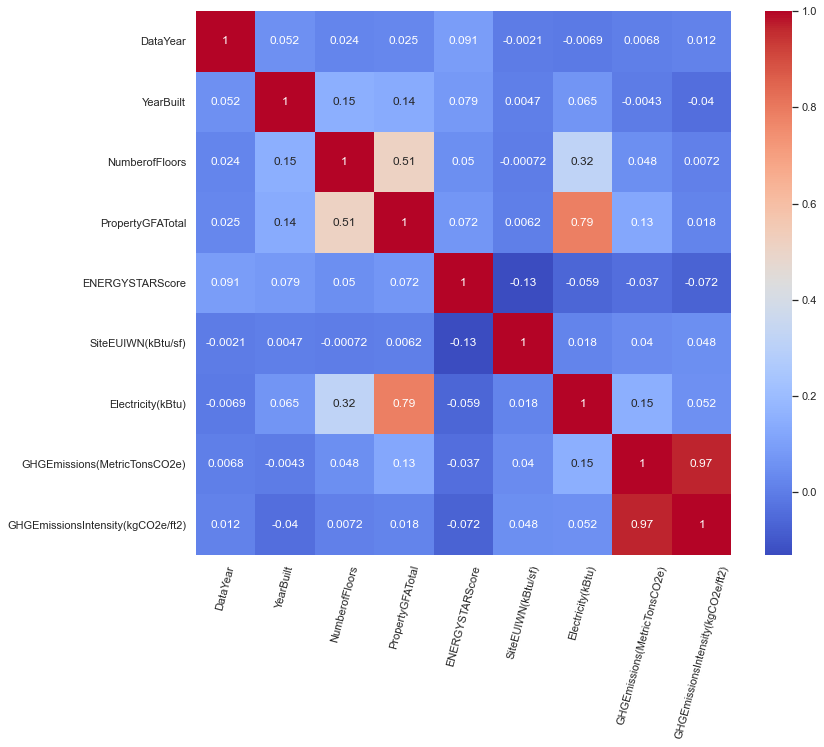

In [8]:
sea_corr = sea[['DataYear', 'YearBuilt', 'NumberofFloors', 'PropertyGFATotal',  'ENERGYSTARScore',
                'SiteEUIWN(kBtu/sf)', 'Electricity(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 
                'GHGEmissionsIntensity(kgCO2e/ft2)'
                ]].copy()

plt.figure(figsize=(12, 10))
sns.heatmap(sea_corr.corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=75)
plt.show()

In [9]:
# find rows where Number of Floors are None
building_id = list(sea.loc[sea['NumberofFloors'].isna(), 'OSEBuildingID'].copy())

# creating df group by ID with correct Number of Floors
floors_none = sea.loc[sea['OSEBuildingID'].isin(building_id), ['OSEBuildingID', 'NumberofFloors']].copy()
floors_none = floors_none.groupby('OSEBuildingID', as_index=False).max('NumberofFollrs')
floors_none

,OSEBuildingID,NumberofFloors
0,24086,0.0
1,40028,1.0
2,40031,0.0
3,40034,0.0
4,43948,2.0
5,49705,0.0
6,49958,1.0
7,49966,1.0


In [10]:
# joining data frames with setting correct Number of Floors
sea_floor = pd.merge(sea, floors_none, how='left', on='OSEBuildingID')
sea_floor['NumberofFloors'] = sea_floor['NumberofFloors_x'].fillna(sea_floor['NumberofFloors_y']).astype(int)
sea_floor.drop(['NumberofFloors_x', 'NumberofFloors_y'], axis=1, inplace=True)

In [11]:

# floors = sea_g['NumberofFloors'].value_counts()

# values = floors.values
# labels = floors.index

# fig = plt.figure(figsize=(20,12))

# ax1 = fig.add_axes([0,0,1,1])
# ax1.bar(labels, values )
# ax1.set_title('Traffic call detailed reason')

# # zoom at building higher than 9 
# values_high = values[labels>9]
# labels_high = labels[labels>9]

# ax2 = fig.add_axes([1.1,0,0.5,0.5])
# ax2.bar(labels_high, values_high)
# ax2.set_xlim(8,None)
# ax2.set_ylim(None, 40)
# ax2.set_title('zoom')

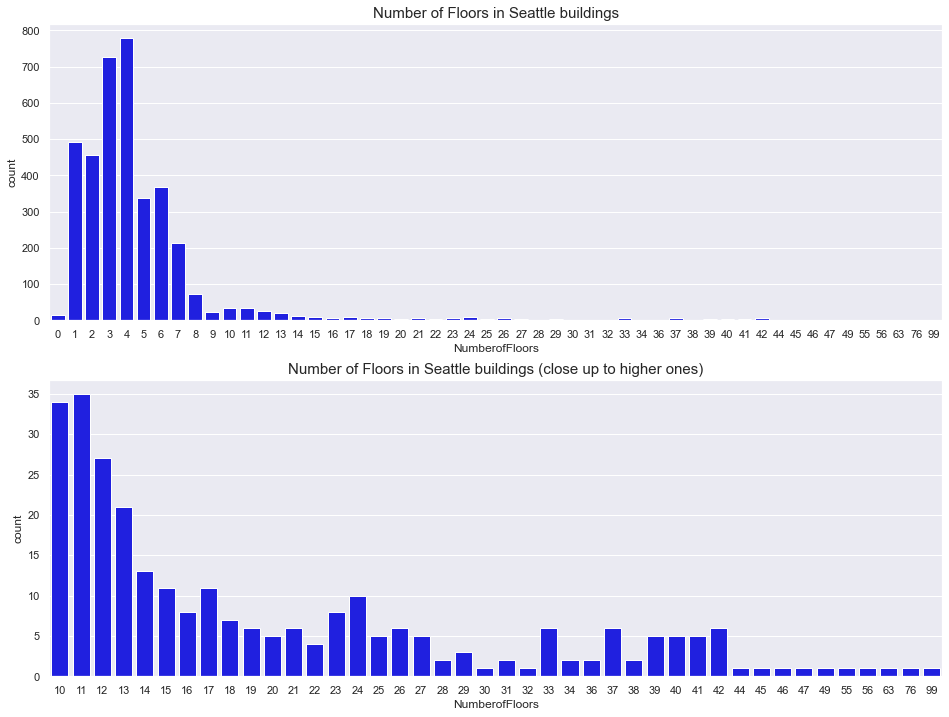

In [13]:
sea_floor_plot = sea_floor.groupby('OSEBuildingID').max('NumerofFloors')

plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
sns.countplot(
    x=sea_floor_plot['NumberofFloors'],
    color='blue'
)
plt.title("Number of Floors in Seattle buildings", fontdict={'fontsize':15})

# close up
plt.subplot(2,1,2)
sns.countplot(
    x=sea_floor_plot.loc[sea_floor_plot['NumberofFloors'] > 9, 'NumberofFloors'],
    color='blue'
)
plt.title("Number of Floors in Seattle buildings (close up to higher ones)", fontdict={'fontsize':15})
plt.show()

In [14]:
# # drop row with 111 buildnigs 
# index_drop = sea_g[sea_g['NumberofBuildings'] == sea_g['NumberofBuildings'].max()].index
# sea_g.drop(index=index_drop, inplace=True)

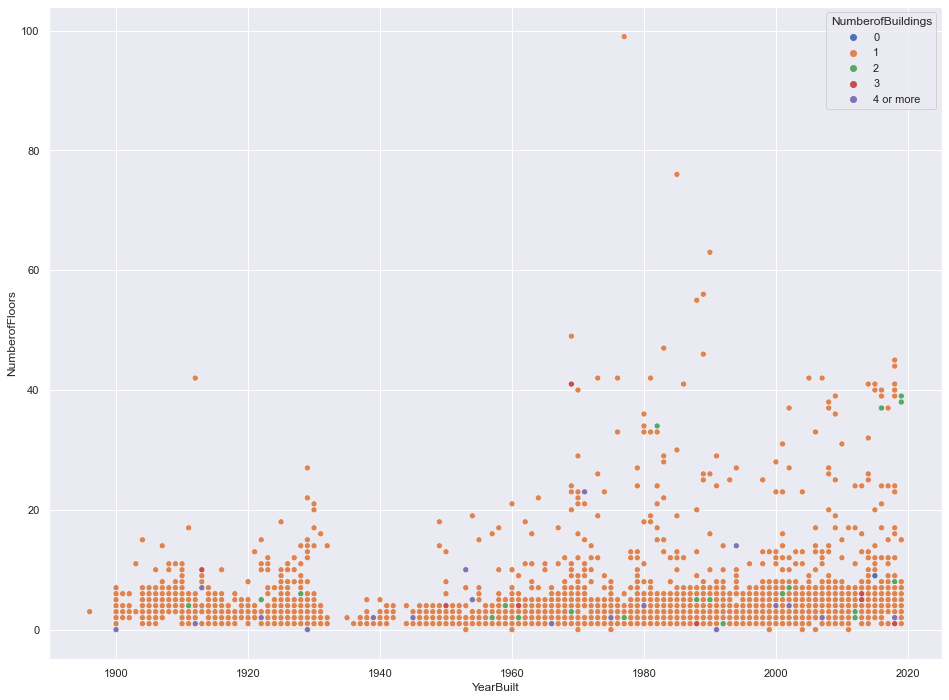

In [15]:
sea_floor_plot = sea_floor.groupby('OSEBuildingID').max('NumerofFloors')
sea_floor_plot.loc[sea_floor_plot['NumberofBuildings']>3, 'NumberofBuildings'] = '4 or more'

plt.figure(figsize=(16,12))

sns.scatterplot(
    data = sea_floor_plot, 
    x='YearBuilt',
    y='NumberofFloors', 
    hue='NumberofBuildings',
    hue_order=[0, 1, 2, 3, '4 or more']
)
plt.show()

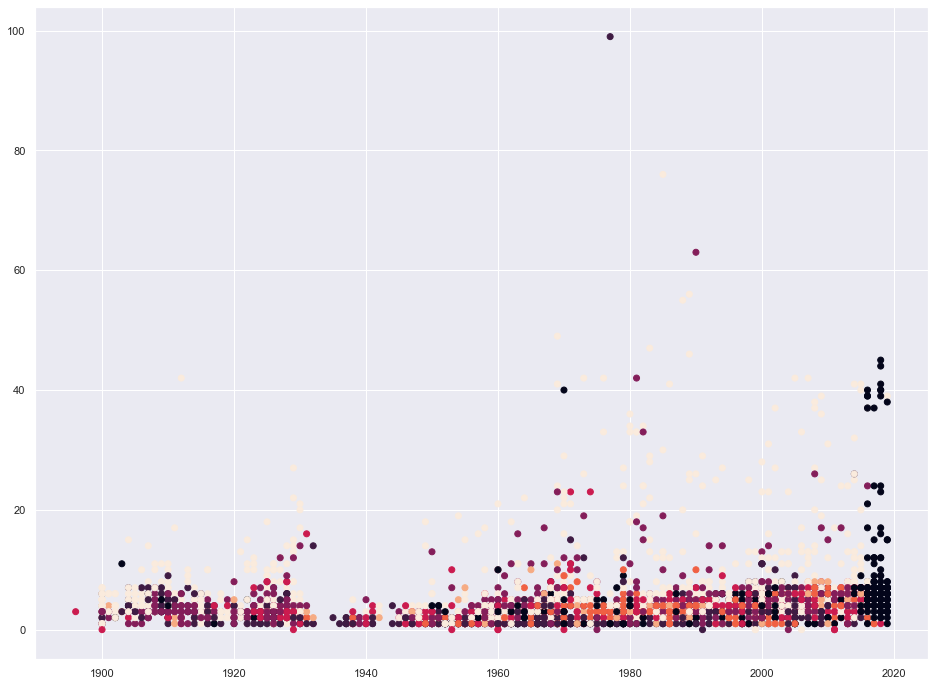

In [18]:
plt.figure(figsize=(16,12))
plt.scatter(
    data = sea_floor_plot,
    x='YearBuilt', 
    y='NumberofFloors', 
    c='CouncilDistrictCode',
#     edgecolors='black'
)
plt.show()

In [33]:
sea_floor_plot.loc['YearBuilt']

3767

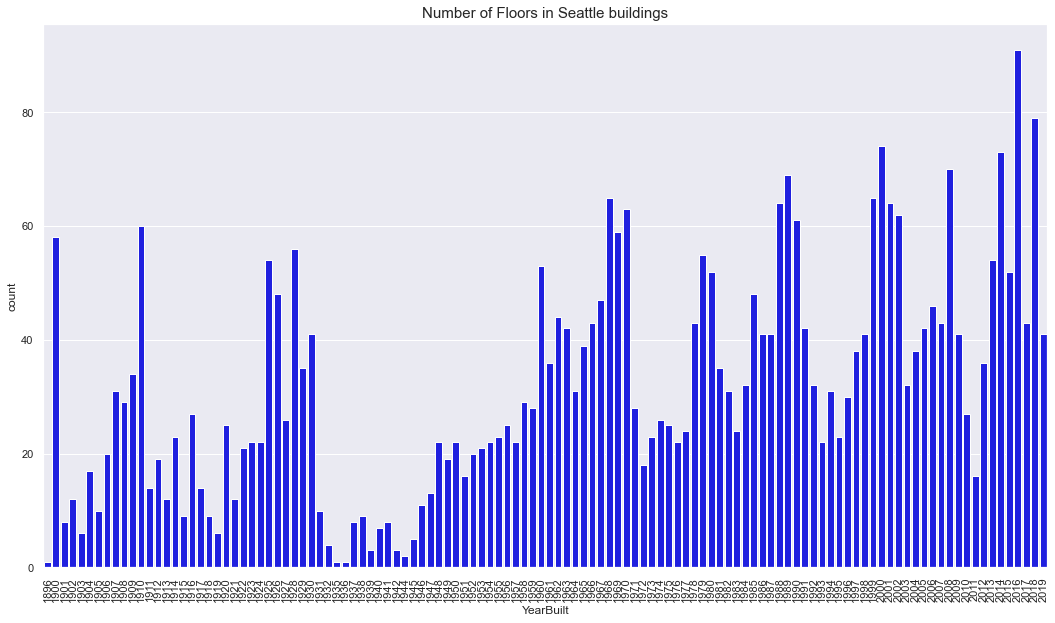

In [40]:
plt.figure(figsize=(18,10))

sns.countplot(
    x=sea_floor_plot['YearBuilt'],
    color='blue',
)
plt.xticks(rotation=90)
plt.title("Number of Floors in Seattle buildings", fontdict={'fontsize':15})
plt.show()